# XArray 01

Real-world datasets are usually more than just raw numbers; they have labels which encode information about how the array values **map to locations** in space, time, etc.

The immediate payoff of using xarray is that you’ll write less code. The long-term payoff is that you’ll understand what you were thinking when you come back to look at it weeks or months later.

## Core data structure

* [DataArray](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.html#xarray.DataArray) is our implementation of a labeled, N-dimensional array. It is an N-D generalization of a **pandas.Series**. The name DataArray itself is borrowed from Fernando Perez’s datarray project, which prototyped a similar data structure.

* [Dataset](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.html#xarray.Dataset) is a multi-dimensional, in-memory array database. It is a dict-like container of DataArray objects aligned along any number of shared dimensions, and serves a similar purpose in xarray to the **pandas.DataFrame**.

## Installation

In [1]:
%%writefile xarray-requirements.txt
xarray
xarray[io]
xarray[accel]
xarray[parallel]
xarray[viz]

Overwriting xarray-requirements.txt


### Install with requirements

In [2]:
# %pip install -r xarray-requirements.txt

## Quick Overview

In [3]:
import numpy as np
import pandas as pd
import xarray as xr

/home/ray/anaconda3/lib/python3.9/site-packages/xarray/backends/cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [8]:
data = xr.DataArray(np.random.rand(5,6,7),
                    dims = ("alpha","beta","gamma"),
                    coords={
                        "alpha":list(f"a{i}" for i in range(5)),
                        "beta":list(f"b{i}" for i in range(6))
                    }
                   )

In [21]:
data.shape

(5, 6, 7)

In [9]:
data.sel({"alpha": "a2","beta":["b2","b3"]})

<xarray.DataArray (beta: 2, gamma: 7)>
array([[0.44583396, 0.04676369, 0.19418846, 0.57919834, 0.16151899,
        0.81942895, 0.33550218],
       [0.51378198, 0.52923953, 0.27750499, 0.80572531, 0.86161738,
        0.13583219, 0.9313442 ]])
Coordinates:
    alpha    <U2 'a2'
  * beta     (beta) <U2 'b2' 'b3'
Dimensions without coordinates: gamma

### Digest pd.Series


In [6]:
xr.DataArray(pd.Series(list(f"val{i}" for i in range(20)),
                       index=list(range(20)), name = "colname"))

<xarray.DataArray 'colname' (dim_0: 20)>
array(['val0', 'val1', 'val2', 'val3', 'val4', 'val5', 'val6', 'val7',
       'val8', 'val9', 'val10', 'val11', 'val12', 'val13', 'val14',
       'val15', 'val16', 'val17', 'val18', 'val19'], dtype=object)
Coordinates:
  * dim_0    (dim_0) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19

In [12]:
data.values.shape

(5, 6, 7)

In [13]:
data.dims

('alpha', 'beta', 'gamma')

In [14]:
data.coords

Coordinates:
  * alpha    (alpha) <U2 'a0' 'a1' 'a2' 'a3' 'a4'
  * beta     (beta) <U2 'b0' 'b1' 'b2' 'b3' 'b4' 'b5'

Attributes still empety

In [15]:
data.attrs

{}

### Indexing

In [32]:
data.loc['a3',['b2','b3']]

<xarray.DataArray (beta: 2, gamma: 7)>
array([[0.29294919, 0.6013221 , 0.78677338, 0.32532156, 0.75245173,
        0.6437877 , 0.43915792],
       [0.27246751, 0.8969204 , 0.87793027, 0.15273677, 0.74661816,
        0.92646989, 0.25479973]])
Coordinates:
    alpha    <U2 'a3'
  * beta     (beta) <U2 'b2' 'b3'
Dimensions without coordinates: gamma

In [37]:
data.attrs['scope'] = "all"

In [52]:
data.sel({'alpha':'a1','beta':['b2','b3']}).attrs['positive']="True"

In [53]:
data.loc['a1',['b2']]

<xarray.DataArray (beta: 1, gamma: 7)>
array([[0.99020923, 0.61815864, 0.89733253, 0.77660361, 0.93628946,
        0.47107212, 0.31454367]])
Coordinates:
    alpha    <U2 'a1'
  * beta     (beta) <U2 'b2'
Dimensions without coordinates: gamma
Attributes:
    scope:    all

In [56]:
data.sum(dim='beta').shape

(5, 7)

In [57]:
data.sum(dim=['alpha','gamma']).shape

(6,)

In [60]:
data.loc['a1',['b5','b2']]-=1

In [61]:
data.loc['a1',['b5','b2']]

<xarray.DataArray (beta: 2, gamma: 7)>
array([[-0.7254182 , -0.44272905, -0.58185521, -0.66946956, -0.37878769,
        -0.6102657 , -0.19604565],
       [-0.00979077, -0.38184136, -0.10266747, -0.22339639, -0.06371054,
        -0.52892788, -0.68545633]])
Coordinates:
    alpha    <U2 'a1'
  * beta     (beta) <U2 'b5' 'b2'
Dimensions without coordinates: gamma
Attributes:
    scope:    all

In [58]:
np.sin(data)

<xarray.DataArray (alpha: 5, beta: 6, gamma: 7)>
array([[[0.58285712, 0.75061301, 0.56744894, 0.75039354, 0.13631481,
         0.17710446, 0.60954071],
        [0.78718157, 0.8134704 , 0.65505902, 0.0305125 , 0.78297017,
         0.69224427, 0.6069334 ],
        [0.172684  , 0.68515484, 0.57329528, 0.07749062, 0.65564712,
         0.80831891, 0.41943574],
        [0.00318508, 0.66567942, 0.03393437, 0.83810594, 0.75330071,
         0.16528575, 0.16643095],
        [0.79936804, 0.67603547, 0.16186551, 0.25286623, 0.44839726,
         0.6789841 , 0.53916076],
        [0.02693341, 0.82347447, 0.82160007, 0.63880679, 0.53700843,
         0.64158092, 0.40458046]],

       [[0.51058267, 0.6915564 , 0.32581309, 0.82800987, 0.63642901,
         0.14689353, 0.63008836],
        [0.61254189, 0.61377501, 0.36711336, 0.47158532, 0.36714435,
         0.71510097, 0.66775173],
        [0.83614076, 0.57953553, 0.781666  , 0.70086083, 0.80536412,
         0.45384189, 0.30938256],
        [0.73824139, 0.30074256, 0.05256643, 0.12070822, 0.55476183,
...
         0.60022925, 0.42517744],
        [0.26910873, 0.78140889, 0.7694185 , 0.15214361, 0.67916041,
         0.79950453, 0.25205161],
        [0.35705175, 0.02615339, 0.13083429, 0.5321933 , 0.63254507,
         0.0142466 , 0.43641372],
        [0.04592303, 0.04305345, 0.79028919, 0.28177056, 0.83336334,
         0.38525426, 0.78398839]],

       [[0.71703694, 0.58343944, 0.37875759, 0.75393059, 0.45591982,
         0.01704276, 0.34675763],
        [0.18474043, 0.62227621, 0.19807584, 0.47761496, 0.70403017,
         0.12028476, 0.62650803],
        [0.38954804, 0.7929401 , 0.32746681, 0.4349302 , 0.78809222,
         0.53497788, 0.44665625],
        [0.38348211, 0.47474237, 0.73702897, 0.1787502 , 0.40485362,
         0.654961  , 0.08767285],
        [0.43503697, 0.80390449, 0.82960112, 0.43315713, 0.40829236,
         0.73725642, 0.64872329],
        [0.79769404, 0.31484307, 0.23085362, 0.7632384 , 0.45090692,
         0.62743184, 0.19963619]]])
Coordinates:
  * alpha    (alpha) <U2 'a0' 'a1' 'a2' 'a3' 'a4'
  * beta     (beta) <U2 'b0' 'b1' 'b2' 'b3' 'b4' 'b5'
Dimensions without coordinates: gamma
Attributes:
    scope:    all

It also means that in most cases, you do not need to worry about the order of dimensions

In [62]:
data-data.T

<xarray.DataArray (alpha: 5, beta: 6, gamma: 7)>
array([[[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]]])
Coordinates:
  * alpha    (alpha) <U2 'a0' 'a1' 'a2' 'a3' 'a4'
  * beta     (beta) <U2 'b0' 'b1' 'b2' 'b3' 'b4' 'b5'
Dimensions without coordinates: gamma

## Group By

In [69]:
labels = xr.DataArray(
    ["E","F","G","C","E"],[data.coords['alpha']], name='labels')
labels

<xarray.DataArray 'labels' (alpha: 5)>
array(['E', 'F', 'G', 'C', 'E'], dtype='<U1')
Coordinates:
  * alpha    (alpha) <U2 'a0' 'a1' 'a2' 'a3' 'a4'

In [77]:
data.groupby(labels).mean("gamma")

<xarray.DataArray (alpha: 5, beta: 6)>
array([[ 0.55622238,  0.70247355,  0.52937354,  0.42080785,  0.55251769,
         0.61879538],
       [ 0.58941118,  0.58442676, -0.28511296,  0.38469164,  0.37965861,
        -0.51493872],
       [ 0.4624802 ,  0.32548678,  0.36891922,  0.57929223,  0.46891296,
         0.32755125],
       [ 0.48165336,  0.69198201,  0.54882337,  0.5897061 ,  0.31919378,
         0.50966271],
       [ 0.50136265,  0.44764079,  0.57636456,  0.44505003,  0.6808264 ,
         0.52743384]])
Coordinates:
  * alpha    (alpha) <U2 'a0' 'a1' 'a2' 'a3' 'a4'
  * beta     (beta) <U2 'b0' 'b1' 'b2' 'b3' 'b4' 'b5'

In [80]:
a = xr.DataArray(np.random.randn(5), coords = [data.coords['alpha']])

In [84]:
b = xr.DataArray(np.random.randn(6), dims ='zeta' )

In [86]:
a + b

<xarray.DataArray (alpha: 5, zeta: 6)>
array([[ 0.50958444,  0.7936628 ,  1.44580721,  2.33965024,  1.64950209,
         0.68511181],
       [-1.69425049, -1.41017213, -0.75802773,  0.13581531, -0.55433284,
        -1.51872312],
       [-2.32731077, -2.04323241, -1.391088  , -0.49724497, -1.18739312,
        -2.1517834 ],
       [ 0.18642363,  0.47050199,  1.1226464 ,  2.01648944,  1.32634128,
         0.361951  ],
       [-1.76858347, -1.48450511, -0.8323607 ,  0.06148233, -0.62866582,
        -1.5930561 ]])
Coordinates:
  * alpha    (alpha) <U2 'a0' 'a1' 'a2' 'a3' 'a4'
Dimensions without coordinates: zeta

### Plot

/home/ray/anaconda3/lib/python3.9/site-packages/xarray/plot/plot.py:1476: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  primitive = ax.pcolormesh(x, y, z, **kwargs)


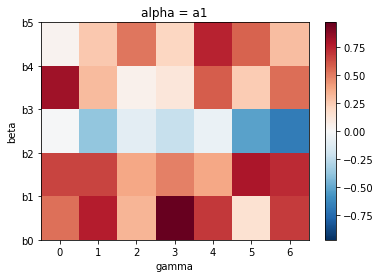

In [89]:
data.loc['a1'].plot()

### to series

In [91]:
pd.DataFrame(data.to_series())

0
alpha beta gamma          
a0    b0   0      0.622240
           1      0.848989
           2      0.603404
           3      0.848657
           4      0.136741
...                    ...
a4    b5   2      0.232955
           3      0.868310
           4      0.467781
           5      0.678251
           6      0.200987

[210 rows x 1 columns]

## Datasets

In [96]:
ds = xr.Dataset(dict(foo=data,bar=('alpha',[9,8,7,6,5]), baz=np.pi))

```bar``` in this case is aligned with ```foo```'s ```alpha```

In [97]:
ds

<xarray.Dataset>
Dimensions:  (alpha: 5, beta: 6, gamma: 7)
Coordinates:
  * alpha    (alpha) <U2 'a0' 'a1' 'a2' 'a3' 'a4'
  * beta     (beta) <U2 'b0' 'b1' 'b2' 'b3' 'b4' 'b5'
Dimensions without coordinates: gamma
Data variables:
    foo      (alpha, beta, gamma) float64 0.6222 0.849 0.6034 ... 0.6783 0.201
    bar      (alpha) int64 9 8 7 6 5
    baz      float64 3.142

### Save and load dataset

In [98]:
ds.to_netcdf('somedata.nc')

In [99]:
xr.open_dataset('somedata.nc')

/home/ray/anaconda3/lib/python3.9/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:  (alpha: 5, beta: 6, gamma: 7)
Coordinates:
  * alpha    (alpha) object 'a0' 'a1' 'a2' 'a3' 'a4'
  * beta     (beta) object 'b0' 'b1' 'b2' 'b3' 'b4' 'b5'
Dimensions without coordinates: gamma
Data variables:
    foo      (alpha, beta, gamma) float64 ...
    bar      (alpha) int64 ...
    baz      float64 ...

In [104]:
xr.save_mfdataset([ds], paths=["./multifile"], mode='w')